In [1]:
#copy/paste the packages for this week

#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

D:\computation\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# load my corpus of interest - All New York Times articles published '80-'89 that mention Vietnam
nyt80s = pandas.read_csv('../data/nyt80s.csv')

In [3]:
print(nyt80s)

                                                 article                date
0         '79 food production in Vietnam was only 13....     January 2 1980 
1         Karleton Armstrong, convicted of '70 bombin...     January 2 1980 
2         Militants holding US diplomatic personnel h...     January 5 1980 
3         Militants holding US diplomatic personnel h...     January 5 1980 
4         China apparently concludes that best strate...     January 5 1980 
5         5 US chemical companies that produced milit...     January 7 1980 
6         Phnom Penh, Cambodia, celebrates 1st annive...     January 8 1980 
7         Australian Government agrees to form indepe...     January 8 1980 
8         Warrant Officer Francis Anton, former Army ...     January 9 1980 
9         Author Richard J Walton article on Soviet i...    January 10 1980 
10        Former Vietnam war prisoner Luis Antonio Or...    January 10 1980 
11        Vietnam accuses China of conducting large-s...    January 10 1980 

In [4]:
nyt80s['tokenized_sents'] = nyt80s['article'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
nyt80s['normalized_sents'] = nyt80s['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

nyt80s[:5]

,article,date,tokenized_sents,normalized_sents
0,'79 food production in Vietnam was only 13....,January 2 1980,"[['79, food, production, in, Vietnam, was, onl...","[[food, production, vietnam, million, tons, mi..."
1,"Karleton Armstrong, convicted of '70 bombin...",January 2 1980,"[[Karleton, Armstrong, ,, convicted, of, '70, ...","[[karleton, armstrong, convicted, bombing, pro..."
2,Militants holding US diplomatic personnel h...,January 5 1980,"[[Militants, holding, US, diplomatic, personne...","[[militants, holding, us, diplomatic, personne..."
3,Militants holding US diplomatic personnel h...,January 5 1980,"[[Militants, holding, US, diplomatic, personne...","[[militants, holding, us, diplomatic, personne..."
4,China apparently concludes that best strate...,January 5 1980,"[[China, apparently, concludes, that, best, st...","[[china, apparently, concludes, best, strategy..."


In [5]:
nyt80sW2V = gensim.models.word2vec.Word2Vec(nyt80s['normalized_sents'].sum())

In [6]:
nyt80sW2V.wv.syn0

array([[-3.1589835 , -0.53163284,  1.4306244 , ..., -1.0956872 ,
         0.78135407, -0.6736695 ],
       [ 0.30249816, -0.6219216 , -0.47457862, ..., -0.42725632,
        -0.1158446 ,  0.24595822],
       [ 1.4580545 , -0.2681672 ,  1.0958669 , ...,  0.27590996,
        -1.1243126 ,  0.6565249 ],
       ...,
       [-0.03697741,  0.02042863, -0.05615607, ..., -0.05170552,
        -0.06618723, -0.11155523],
       [-0.0493137 , -0.05850989, -0.04901199, ..., -0.04150064,
        -0.05983985, -0.16138934],
       [-0.03722346, -0.03205043, -0.05221342, ..., -0.07411369,
        -0.09210993, -0.21265525]], dtype=float32)

In [7]:
# let's see what's in here:

nyt80sW2V.wv.index2word[11]

'people'

In [8]:
# Below, I find some interesting associations. 
# For one, 'missing' is highly related to 'captivity' - which supports some
# of my intuitions about the larger conversation regarding MIAs from the war
# in Vietnam.

# For two, 'insane' is highly related to 'prisoner'! This could related to either
# 1) mental health issues in the former POW population, or 2) general skepticism
# of the narrative that some captives were still left alive in Southeast Asia.

# For three, the word that "doesn't belong" among 'missing, prisoner, vietnam, regan, and carter'
# is 'missing.' I was surprised by this, because I believe 'missing' to probably
# appear more commonly than 'prisoner'. Perhaps this means that dicussion of 
# the Iran hostrage crisis is a center of gravity in this corpus. 

In [9]:
nyt80sW2V.most_similar('missing')

[('unaccounted', 0.7228224277496338),
 ('servicemen', 0.6714282631874084),
 ('dead', 0.6123371124267578),
 ('listed', 0.6082803010940552),
 ('captivity', 0.5820255279541016),
 ('alive', 0.5591003894805908),
 ('amerasian', 0.5541995167732239),
 ('remains', 0.5480892658233643),
 ('captive', 0.5349116921424866),
 ('amerasians', 0.5303720235824585)]

In [10]:
nyt80sW2V.most_similar('reagan')

[('carter', 0.7838046550750732),
 ('dellums', 0.6628786325454712),
 ('cristiani', 0.65256667137146),
 ('bush', 0.6477524042129517),
 ('mondale', 0.6081035733222961),
 ('nixon', 0.5597339868545532),
 ('eisenhower', 0.5548985004425049),
 ('quirino', 0.548701286315918),
 ('glasser', 0.5401358604431152),
 ('botha', 0.5257538557052612)]

In [11]:
nyt80sW2V.most_similar('prisoner')

[('prisoners', 0.7386739253997803),
 ('comrades', 0.7027726173400879),
 ('captive', 0.6728923320770264),
 ('serviceman', 0.6690366864204407),
 ('captors', 0.6660491228103638),
 ('lai', 0.6339216232299805),
 ('crimean', 0.630526602268219),
 ('collaborating', 0.6273119449615479),
 ('garwood', 0.6210662126541138),
 ('insane', 0.6113227605819702)]

In [12]:
nyt80sW2V.most_similar('vietnam')

[('korean', 0.6219003200531006),
 ('indochina', 0.5934177041053772),
 ('korea', 0.5798124074935913),
 ('vietnamese', 0.5768474340438843),
 ('vietman', 0.5506376028060913),
 ('hanoi', 0.47115659713745117),
 ('unpopular', 0.46369051933288574),
 ('koreans', 0.4607482850551605),
 ('prisoner', 0.4490695893764496),
 ('scandals', 0.446930468082428)]

In [13]:
nyt80sW2V.doesnt_match(['missing', 'prisoner', 'vietnam', 'reagan', 'carter'])

'missing'

In [14]:
nyt80sW2V.most_similar(positive=['vietnam', 'war'], negative = ['captivity'])

[('wars', 0.5431727170944214),
 ('battles', 0.47961169481277466),
 ('conflict', 0.4717048704624176),
 ('battle', 0.4485143721103668),
 ('korea', 0.44090402126312256),
 ('protracted', 0.4230174720287323),
 ('combat', 0.4164043664932251),
 ('peacetime', 0.3979357182979584),
 ('involvement', 0.3926404118537903),
 ('warfare', 0.3898194432258606)]

In [15]:
def cos_difference(embedding,word1,word2):
    return sklearn.metrics.pairwise.cosine_similarity(embedding[word1].reshape(1,-1),embedding[word2].reshape(1,-1))

estimatesB=[]
for x in range(20):
    nyt80sW2V = gensim.models.word2vec.Word2Vec(nyt80s['normalized_sents'].sample(frac=1.0, replace=True).sum())
    try:
        estimatesB.append(cos_difference(nyt80sW2V, 'missing', 'captivity')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

[0.39981657,
 0.40397495,
 0.41694286,
 0.43799084,
 0.45825022,
 0.4638214,
 0.46383402,
 0.4919601,
 0.49328873,
 0.49751595,
 0.498798,
 0.49906626,
 0.5023784,
 0.5084037,
 0.5108934,
 0.52241623,
 0.5362417,
 0.55117756,
 0.5623039,
 0.5882986]

In [16]:
print("The 90% confidence interval for the cosine distance between missing and captivity is:\n",estimatesB[1], estimatesB[-2])

The 90% confidence interval for the cosine distance between missing and captivity is:
 0.40397495 0.5623039


In [17]:
# subsetting

n_samples = 10
sample_indices = np.random.randint(0,n_samples,(len(nyt80s),))

s_k =np.array([])
tau_k=np.array([])

for i in range(n_samples):
    sample_w2v = gensim.models.word2vec.Word2Vec(nyt80s[sample_indices == i]['normalized_sents'].sum())
    try:
        #Need to use words present in most samples
        s_k = np.append(s_k, cos_difference(sample_w2v, 'missing', 'captivity')[0,0])
    except KeyError:
        pass
    else:
        tau_k = np.append(tau_k, len(nyt80s[sample_indices == i]))

print(s_k)
print(tau_k)

tau = tau_k.sum()
s = s_k.mean()
B_k = np.sqrt(tau_k) * s_k-s_k.mean()

[0.88751757 0.85879606 0.91805565 0.9141649  0.86145151 0.95805216
 0.8538636  0.77621853 0.79948354]
[1093. 1139. 1054. 1170. 1119. 1098. 1103. 1147. 1150.]


In [18]:
print("The 90% confidence interval for the cosine distance between missing and captivity is:\n",s-B_k[-2]/np.sqrt(tau), s-B_k[1]/np.sqrt(tau))

The 90% confidence interval for the cosine distance between missing and captivity is:
 0.6164688515092399 0.5896159140705902


In [19]:
# let's visualize!

numWords = 150
targetWords = nyt80sW2V.wv.index2word[:numWords]

In [20]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(nyt80sW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-1.4037611 ,  0.36782336,  0.03981459, ...,  0.4764437 ,
        -0.9252937 , -0.08730292],
       [ 1.4148921 , -1.3820692 , -0.3098317 , ...,  0.06569379,
         0.88716364,  0.3591785 ],
       [ 1.4843091 , -1.3190894 ,  1.7932211 , ...,  1.2458665 ,
         2.4254544 ,  2.2316234 ],
       ...,
       [ 0.25024217,  1.0049461 ,  2.5287013 , ...,  3.3610148 ,
        -0.8874486 ,  3.2808614 ],
       [-0.25070062, -0.39801088, -0.25949463, ..., -0.18523309,
        -0.88787204,  2.9020581 ],
       [ 0.55617154,  0.66619045,  2.6023169 , ...,  0.35793158,
        -1.5628735 ,  0.3756632 ]], dtype=float32)

In [21]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

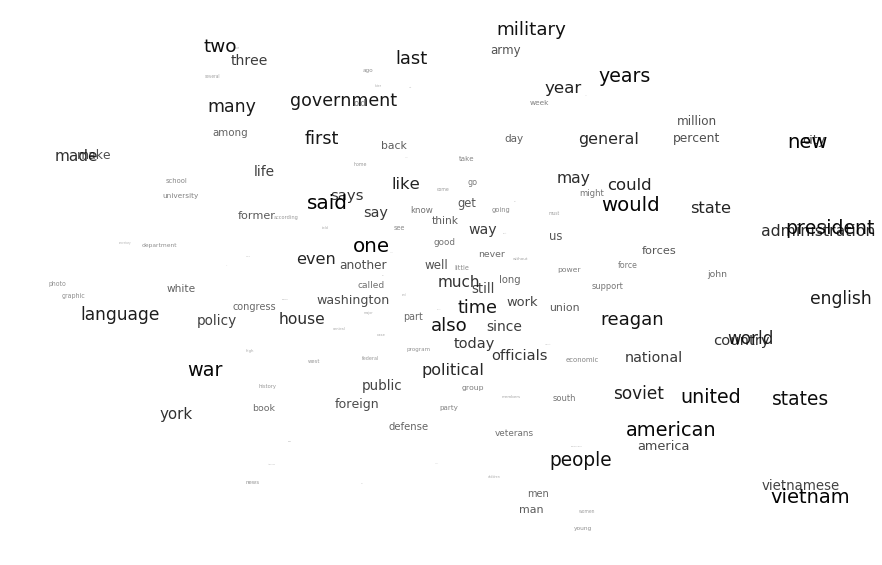

In [22]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()